In [1]:
import import_ipynb
from reccnn import RecCNN
from comcnn import ComCNN
from keras.models import Model

importing Jupyter notebook from reccnn.ipynb


/home/chandu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from comcnn.ipynb


In [2]:
from keras.layers import Input
from keras.callbacks import ModelCheckpoint
import tensorflow as tf


inp2 = Input(shape=(64, 64, 3))
rec_cnn = RecCNN(3)
model_reccnn = Model(inp2, rec_cnn.fsrcnn(inp2))
model_reccnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
checkpointr = ModelCheckpoint(filepath='reccnn.weights.best.hdf5', save_best_only=True, verbose=1)
model_reccnn.summary()

inp1 = Input(shape=(256, 256, 3))
com_cnn = ComCNN(3)
model_comcnn = Model(inp1, model_reccnn(com_cnn.compact(inp1)))
model_comcnn.layers[4].trainable = False
model_comcnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
checkpointc = ModelCheckpoint(filepath='comcnn.weights.best.hdf5', save_best_only=True, verbose=1)
model_comcnn.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 56)        4256      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 12)        684       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 12)        1308      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 12)        1308      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 12)        1308      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 12)        1308      
__________

In [3]:
model_comcnn.load_weights('/home/chandu/Desktop/comcnn.weights.best.hdf5')

In [4]:
import matplotlib.image as mpimg
import cv2
import numpy as np
from tqdm import tqdm
import os

X = []
file = '/home/chandu/Desktop/Test/'
for i in tqdm(os.listdir(file)):
    print(i)
    img_loc = file + i
    img = cv2.imread(img_loc)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X.append(img)
    
X = np.array(X)
print(X.shape)
X = X.astype('float32')
X/=255

100%|██████████| 7/7 [00:00<00:00, 455.85it/s]

ILSVRC2012_val_00028469.JPEG
ILSVRC2012_val_00028596.JPEG
img256.jpg
kohli(2)256.jpg
img-new.png
kohli256.jpeg
messi256.jpg
(7, 256, 256, 3)


In [5]:
import matplotlib.pyplot as plt

plt.imshow(X[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
Y = model_comcnn.predict(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


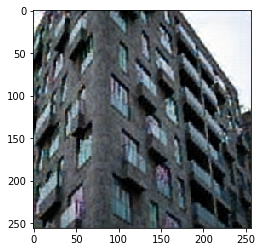

(7, 256, 256, 3)


In [13]:
import matplotlib.pyplot as plt

plt.imshow(Y[4])
plt.show()
print(Y.shape)


In [14]:
from skimage.measure import compare_ssim, compare_psnr
Z = []

for i in range(X.shape[0]):
    Z.append(compare_ssim(X[i], Y[i], multichannel=True))
#     print(compare_ssim(X[i], Y[i], multichannel=True))
    print(compare_psnr(X[i], Y[i]))


25.78929600137327
23.53268700873187
26.50515999520295
25.384033083795234
21.820121637616555
29.162941821835293
25.707350607530216


In [9]:
# 0.9003295533937514
# 0.7887920752491672
# 0.8883187384861736
# 0.9056836851595559
# 0.9392450747733821
# 0.8741030071184679



# 0.8825890998323503
# 0.8899615849703929
# 0.9319657616672593
# 0.8549105954252353

In [10]:
# model_reccnn.load_weights('/home/chandu/Desktop/reccnn.weights.best.hdf5')

# X = []
# img1 = cv2.imread('/home/chandu/Desktop/girl64.jpg')
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# X.append(img1)
# X.append(img1)

# X = np.array(X)
# X = X.astype('float32')
# X = X/255

# Y = model_reccnn.predict(X)

# import matplotlib.pyplot as plt

# plt.imshow(X[0])
# plt.show()

# mpimg.imsave('/home/chandu/Desktop/girl256.png', Y[0])
# plt.imshow(Y[0])
# plt.show()

